In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ckdisease/kidney_disease.csv


In [10]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [11]:
# loading data

df= pd.read_csv('../input/ckdisease/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
df.shape

(400, 26)

In [13]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [14]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [15]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [18]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [20]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [21]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [22]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [23]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [24]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



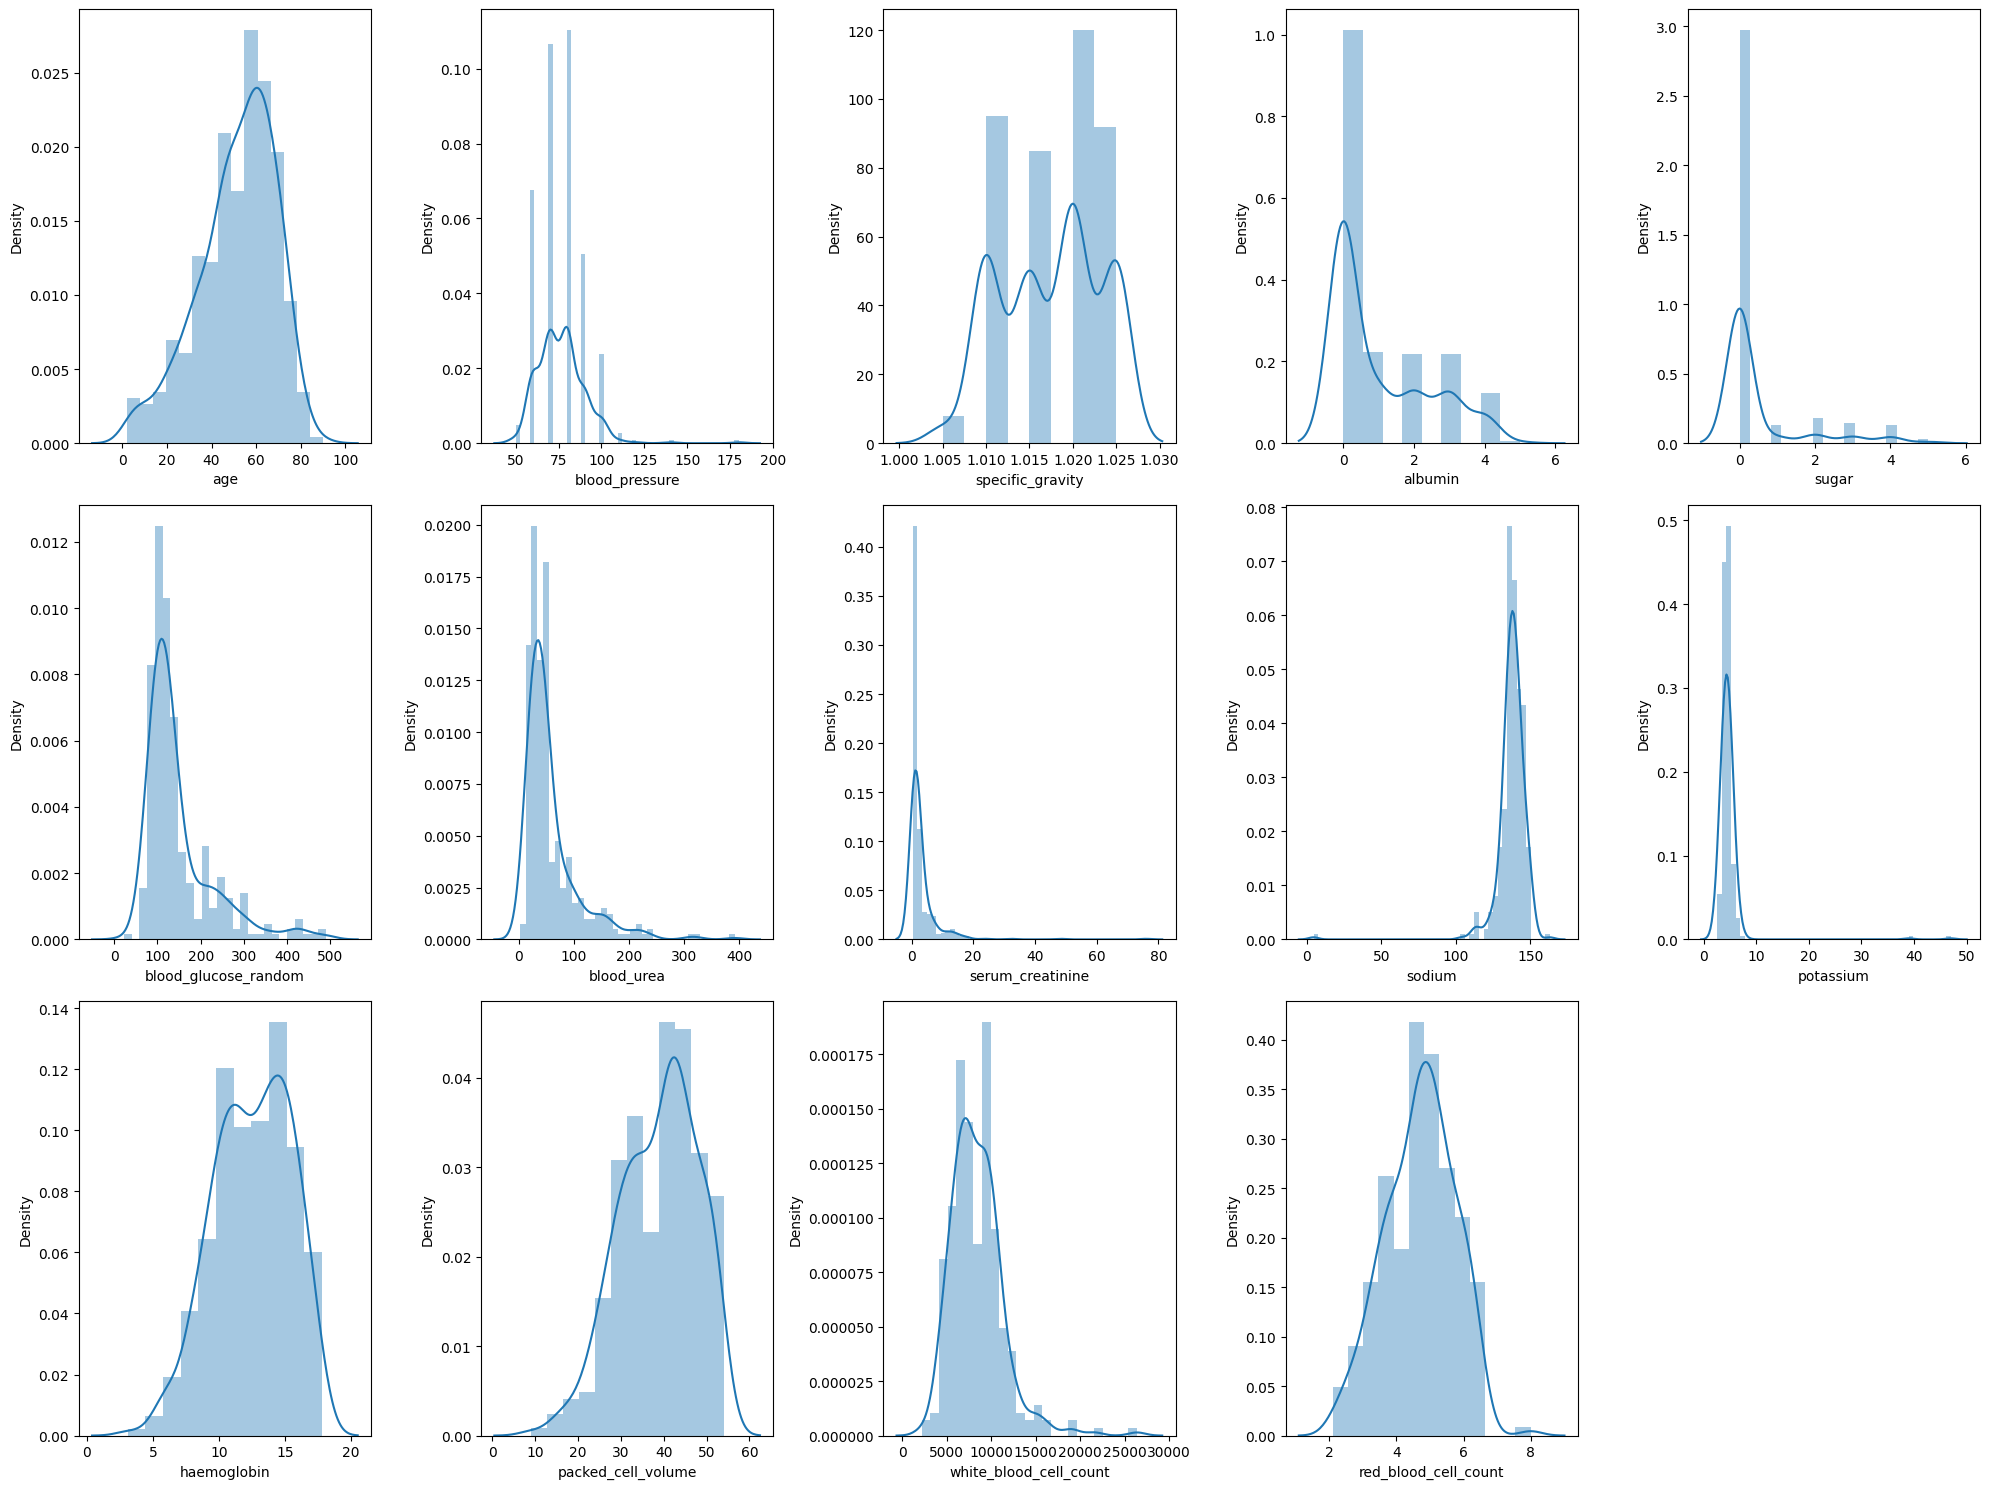

In [25]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

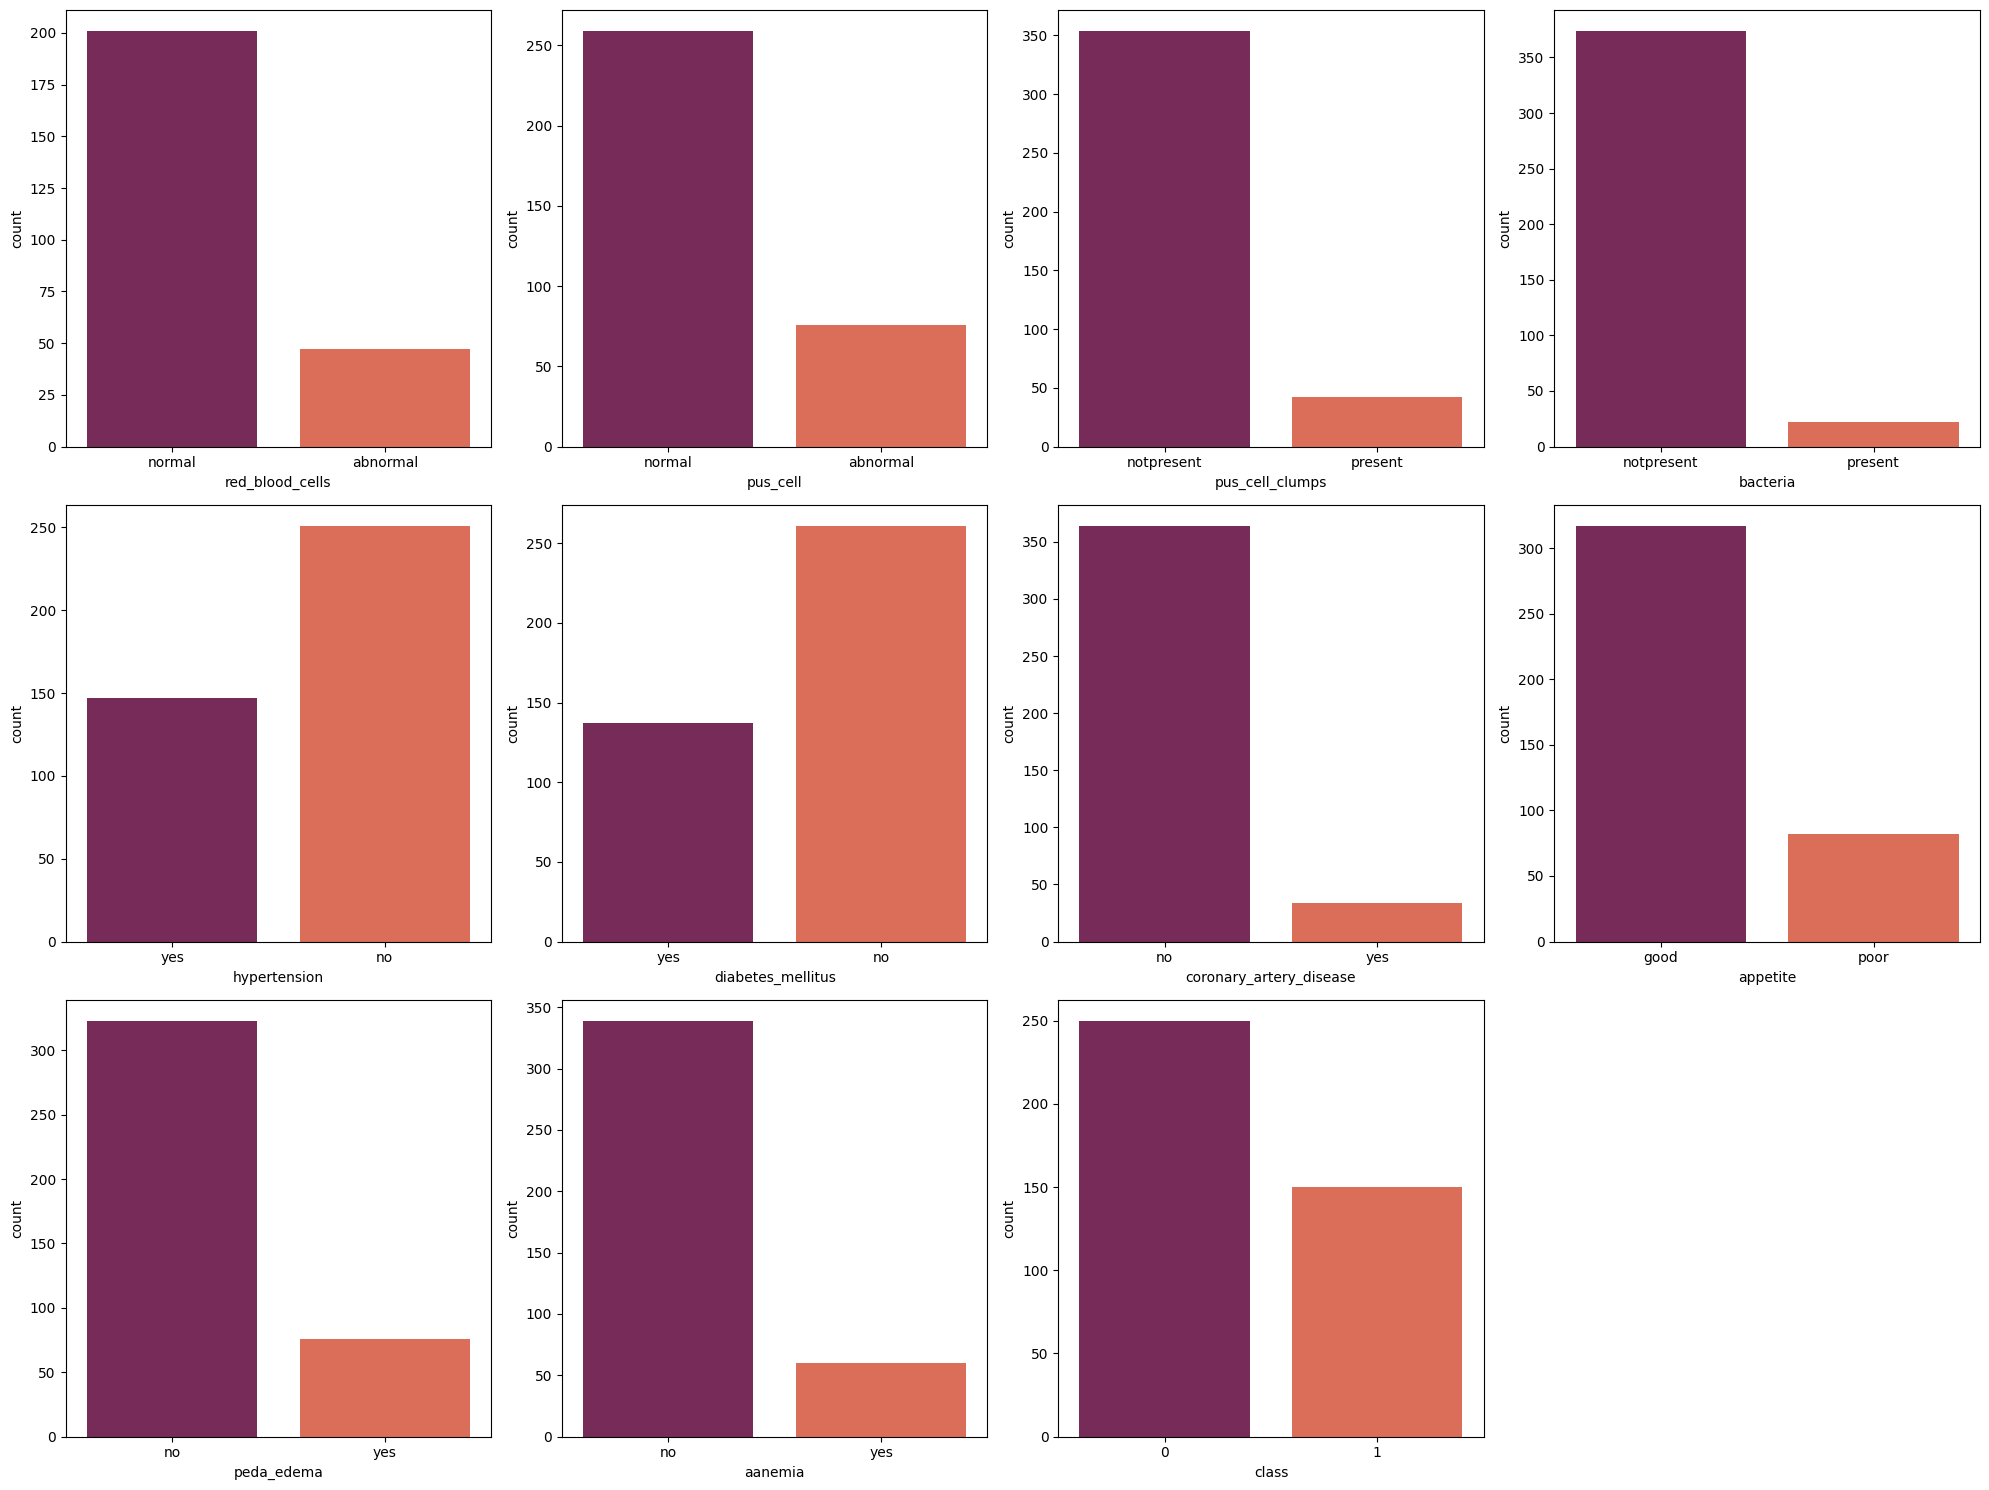

In [26]:
# Plotting categorical columns explicitly specifying x=column and data=df
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x=column, data=df, palette='rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


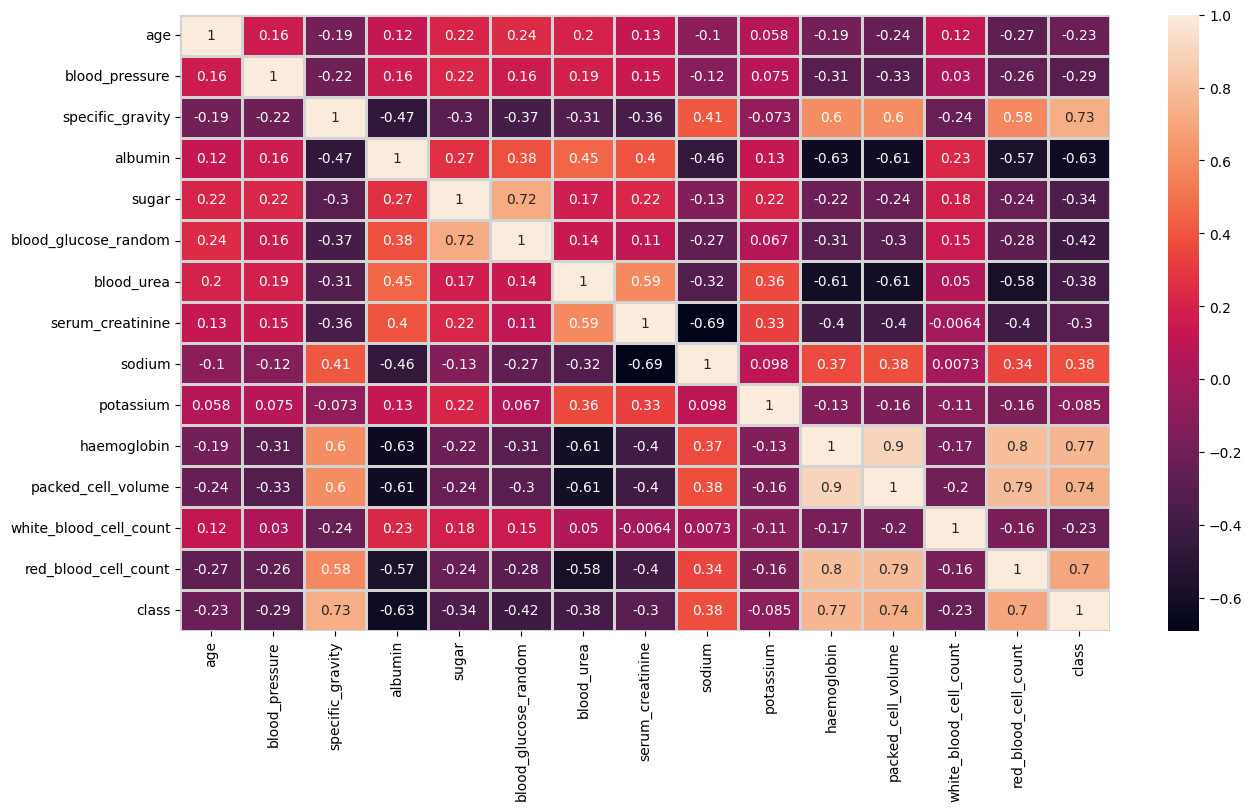

In [27]:
# Select only numeric columns for the correlation heatmap
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=2, linecolor='lightgrey')
plt.show()



In [28]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [29]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [30]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [31]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [32]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [33]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [34]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [35]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [36]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [38]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,76.0,...,38.0,6000.0,5.4,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.9,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [39]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best hyperparameters for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Experiment with different k values
    'weights': ['uniform', 'distance'],  # Try 'uniform' or 'distance' weights
    'metric': ['euclidean', 'manhattan'],  # Experiment with different distance metrics
}

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Calculate accuracy score, confusion matrix, and classification report for the best KNN model
train_acc = accuracy_score(y_train, best_knn.predict(X_train_scaled))
test_acc = accuracy_score(y_test, best_knn.predict(X_test_scaled))

print(f"Training Accuracy of KNN is {train_acc}")
print(f"Test Accuracy of KNN is {test_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, best_knn.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n{classification_report(y_test, best_knn.predict(X_test_scaled))}")


Training Accuracy of KNN is 0.9607142857142857
Test Accuracy of KNN is 0.9916666666666667 

Confusion Matrix :- 
[[71  1]
 [ 0 48]]

Classification Report :- 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize DecisionTreeClassifier with max_depth to control overfitting
dtc = DecisionTreeClassifier(max_depth=5)  # Adjust max_depth as needed
dtc.fit(X_train, y_train)

# Calculate accuracy score, confusion matrix, and classification report for Decision Tree
train_acc = accuracy_score(y_train, dtc.predict(X_train))
test_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {train_acc}")
print(f"Test Accuracy of Decision Tree Classifier is {test_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n{classification_report(y_test, dtc.predict(X_test))}")


Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[71  1]
 [ 3 45]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [43]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[72  0]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize DecisionTreeClassifier with parameters to control overfitting
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)

# Initialize AdaBoostClassifier with the decision tree as the base estimator
ada = AdaBoostClassifier(base_estimator=dtc, n_estimators=50, learning_rate=0.01)  # Adjust parameters as needed
ada.fit(X_train, y_train)

# Calculate accuracy score, confusion matrix, and classification report for AdaBoost
train_acc = accuracy_score(y_train, ada.predict(X_train))
test_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of AdaBoost Classifier is {train_acc}")
print(f"Test Accuracy of AdaBoost Classifier is {test_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n{classification_report(y_test, ada.predict(X_test))}")


Training Accuracy of AdaBoost Classifier is 1.0
Test Accuracy of AdaBoost Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[72  0]
 [ 5 43]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.90      0.95        48

    accuracy                           0.96       120
   macro avg       0.97      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Logistic Regression
lr = LogisticRegression(max_iter=1000)

# Fit the model
lr.fit(X_train, y_train)

# Predictions
train_acc = accuracy_score(y_train, lr.predict(X_train))
test_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {train_acc}")
print(f"Test Accuracy of Logistic Regression is {test_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, lr.predict(X_test))}\n")
print(f"Classification Report :- \n{classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.9607142857142857
Test Accuracy of Logistic Regression is 0.9666666666666667 

Confusion Matrix :- 
[[71  1]
 [ 3 45]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [47]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Ridge Classifier
ridge = RidgeClassifier()

# Fit the model
ridge.fit(X_train, y_train)

# Predictions
train_acc = accuracy_score(y_train, ridge.predict(X_train))
test_acc = accuracy_score(y_test, ridge.predict(X_test))

print(f"Training Accuracy of Ridge Classifier is {train_acc}")
print(f"Test Accuracy of Ridge Classifier is {test_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ridge.predict(X_test))}\n")
print(f"Classification Report :- \n{classification_report(y_test, ridge.predict(X_test))}")


Training Accuracy of Ridge Classifier is 0.9464285714285714
Test Accuracy of Ridge Classifier is 0.95 

Confusion Matrix :- 
[[66  6]
 [ 0 48]]

Classification Report :- 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        72
           1       0.89      1.00      0.94        48

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120



In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Gaussian Naive Bayes
nb = GaussianNB()

# Fit the model
nb.fit(X_train, y_train)

# Predictions
train_acc = accuracy_score(y_train, nb.predict(X_train))
test_acc = accuracy_score(y_test, nb.predict(X_test))

print(f"Training Accuracy of Naive Bayes is {train_acc}")
print(f"Test Accuracy of Naive Bayes is {test_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, nb.predict(X_test))}\n")
print(f"Classification Report :- \n{classification_report(y_test, nb.predict(X_test))}")

Training Accuracy of Naive Bayes is 0.9571428571428572
Test Accuracy of Naive Bayes is 0.9416666666666667 

Confusion Matrix :- 
[[69  3]
 [ 4 44]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.94      0.92      0.93        48

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



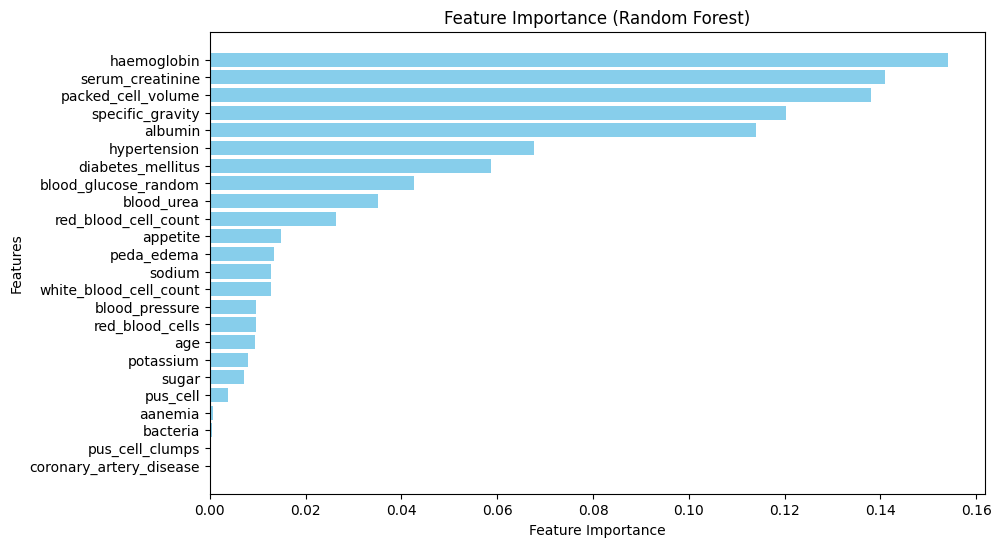

In [49]:
# For Random Forest
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rd_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


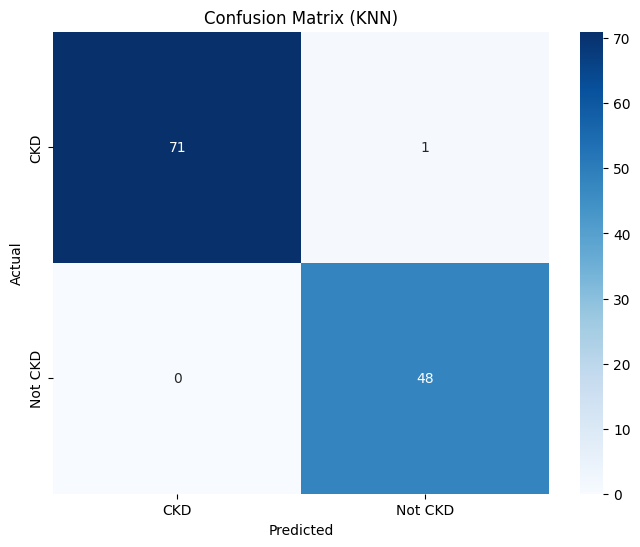

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example for KNN
conf_matrix = confusion_matrix(y_test, best_knn.predict(X_test_scaled))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['CKD', 'Not CKD'], yticklabels=['CKD', 'Not CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()


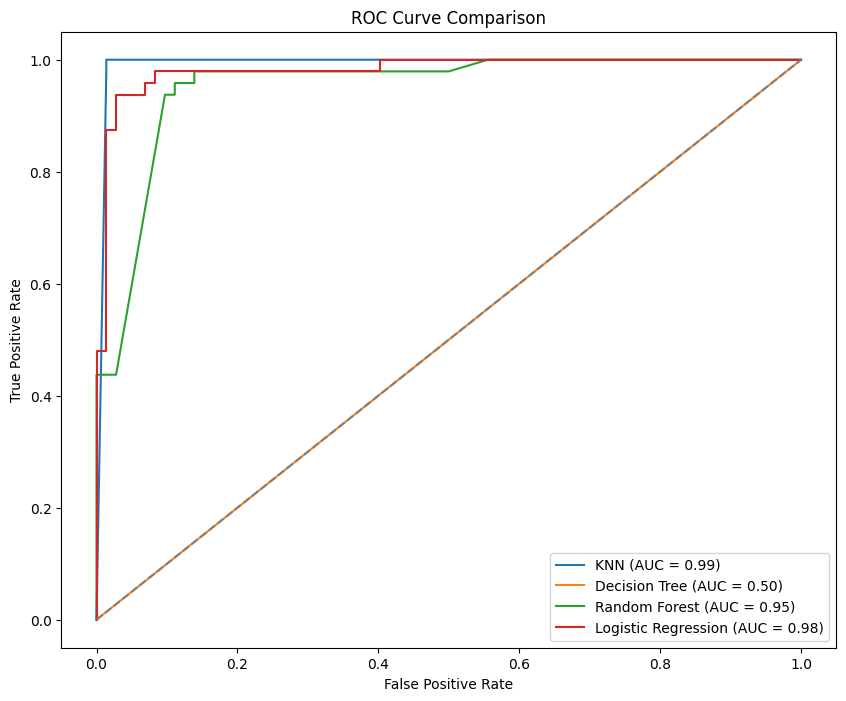

In [57]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the DecisionTreeClassifier again to ensure it's trained
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

# Ensure all models are fitted and add them to the models dictionary
models = {
    'KNN': best_knn,
    'Decision Tree': dtc,
    'Random Forest': rd_clf,
    'Logistic Regression': lr
}

# Plot the ROC Curve for all models that support `predict_proba`
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Use `predict_proba` if available, skip models that don't support it
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        print(f"{name} does not support probability predictions. Skipping...")
        continue

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    # Plot each model's ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Add a reference line for random guessing
plt.plot([0, 1], [0, 1], 'k--', color='gray', linestyle='--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()



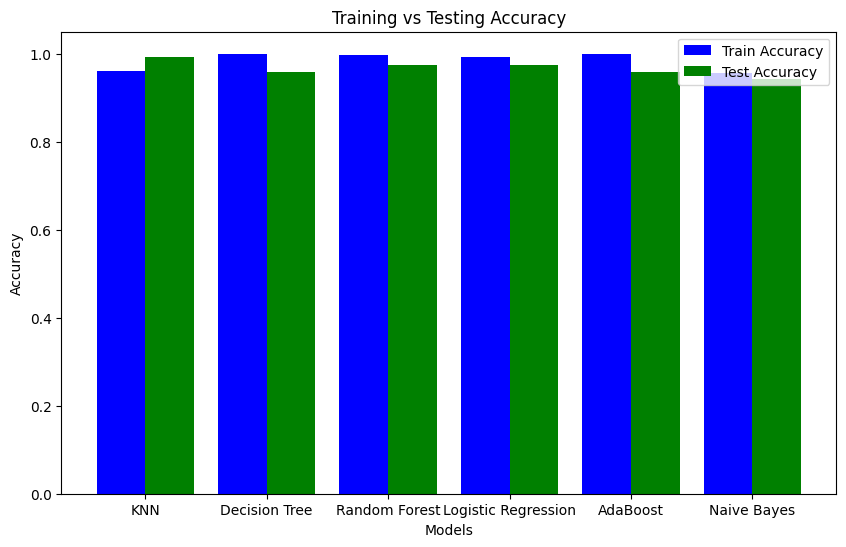

In [58]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Fit all models
best_knn.fit(X_train_scaled, y_train)  # Assuming KNN requires scaled data
dtc.fit(X_train, y_train)             # Decision Tree
rd_clf.fit(X_train, y_train)          # Random Forest
lr.fit(X_train_scaled, y_train)       # Logistic Regression (scaled data assumed)
ada.fit(X_train, y_train)             # AdaBoost
nb.fit(X_train, y_train)              # Naive Bayes

# Model names
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'AdaBoost', 'Naive Bayes']

# Calculate training and testing accuracies
train_accuracies = [
    accuracy_score(y_train, best_knn.predict(X_train_scaled)),
    accuracy_score(y_train, dtc.predict(X_train)),
    accuracy_score(y_train, rd_clf.predict(X_train)),
    accuracy_score(y_train, lr.predict(X_train_scaled)),
    accuracy_score(y_train, ada.predict(X_train)),
    accuracy_score(y_train, nb.predict(X_train))
]

test_accuracies = [
    accuracy_score(y_test, best_knn.predict(X_test_scaled)),
    accuracy_score(y_test, dtc.predict(X_test)),
    accuracy_score(y_test, rd_clf.predict(X_test)),
    accuracy_score(y_test, lr.predict(X_test_scaled)),
    accuracy_score(y_test, ada.predict(X_test)),
    accuracy_score(y_test, nb.predict(X_test))
]

# Plot training vs testing accuracy
plt.figure(figsize=(10, 6))
x = range(len(model_names))
plt.bar(x, train_accuracies, width=0.4, label='Train Accuracy', color='blue', align='center')
plt.bar([i + 0.4 for i in x], test_accuracies, width=0.4, label='Test Accuracy', color='green', align='center')
plt.xticks([i + 0.2 for i in x], model_names)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.show()


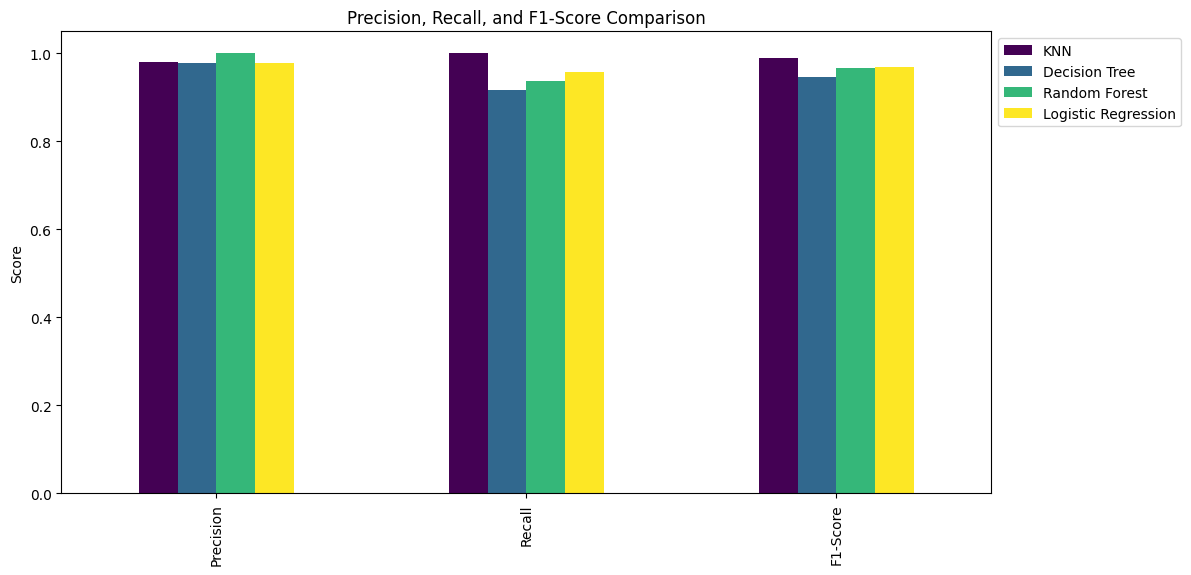

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Fit the models if not already fitted
best_knn.fit(X_train_scaled, y_train)  # Assuming KNN uses scaled data
dtc.fit(X_train, y_train)             # Decision Tree
rd_clf.fit(X_train, y_train)          # Random Forest
lr.fit(X_train_scaled, y_train)       # Logistic Regression (uses scaled data)

# Calculate precision, recall, and F1-score
metrics = ['Precision', 'Recall', 'F1-Score']
values = {
    'KNN': [
        precision_score(y_test, best_knn.predict(X_test_scaled)),
        recall_score(y_test, best_knn.predict(X_test_scaled)),
        f1_score(y_test, best_knn.predict(X_test_scaled))
    ],
    'Decision Tree': [
        precision_score(y_test, dtc.predict(X_test)),
        recall_score(y_test, dtc.predict(X_test)),
        f1_score(y_test, dtc.predict(X_test))
    ],
    'Random Forest': [
        precision_score(y_test, rd_clf.predict(X_test)),
        recall_score(y_test, rd_clf.predict(X_test)),
        f1_score(y_test, rd_clf.predict(X_test))
    ],
    'Logistic Regression': [
        precision_score(y_test, lr.predict(X_test_scaled)),
        recall_score(y_test, lr.predict(X_test_scaled)),
        f1_score(y_test, lr.predict(X_test_scaled))
    ]
}

# Create DataFrame for metrics
df_metrics = pd.DataFrame(values, index=metrics)

# Plot the metrics
df_metrics.plot(kind='bar', figsize=(12, 6), cmap='viridis')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score Comparison')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
